In [1]:
import numpy as np
from ROOT import TCanvas, TGraphErrors, TF1, TGraph,TLatex
from ROOT import gROOT
from array import array

Welcome to JupyROOT 6.16/00


In [2]:
#Part 3
n=[24.6,24.4,23.8,22.9,22.1,21.3,20.5,19.7,18.8,18.1,17.2,16.4,15.5,14.7,13.8,12.9,24.8,25.4,26.1,27,27.7,28.5,29.3,30.2,30.9,31.7,32.5,33.3,34.1,35,35.6,36.3,37.1]
sn=[]
ndata=len(n)
s=[]
ss=[]
y=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17,-18,-19]
sy=[]
x=100
for i in range(0,ndata):
    sn.append(0.1)
for i in range (1,ndata):
    s.append((n[i]-n[0])/np.sqrt(x**2+(n[i]-n[0])**2))
    ss.append(0)
    #ss.append(np.sqrt(((n[i]-n[0])*x*15/(np.sqrt(x**2+(n[i]-n[0])**2)**3))**2+(sn[i]*(1/np.sqrt(x**2+(n[i]-n[0])**2)-(n[i]-n[0])**2))**2))
    sy.append(0)
    y[i]=y[i]*632.8

print(s)
print(ss)




[-0.001999996000012028, -0.007999744012287351, -0.016997544032318207, -0.024992191160203066, -0.0329820461624668, -0.04096558288530406, -0.048941281216718, -0.05790268944581783, -0.06486312108268012, -0.07379821634831436, -0.08172569852979887, -0.09062553858790884, -0.09851838783325115, -0.10737560096420512, -0.1162073225010397, 0.001999996000011993, 0.007999744012287317, 0.014998312784712241, 0.023993090984551435, 0.030985115227341133, 0.03897037429124692, 0.046948174346363294, 0.05591239798617565, 0.0628753474370318, 0.07082171825626164, 0.07875462842751695, 0.08667260586679051, 0.09457419252642064, 0.1034420897109514, 0.10934047915289762, 0.11620732250103964, 0.12403473458920847]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [3]:
x  =  array( 'f', s)
sx  =  array( 'f', ss)
y= array('f', y)
sy= array('f',sy)


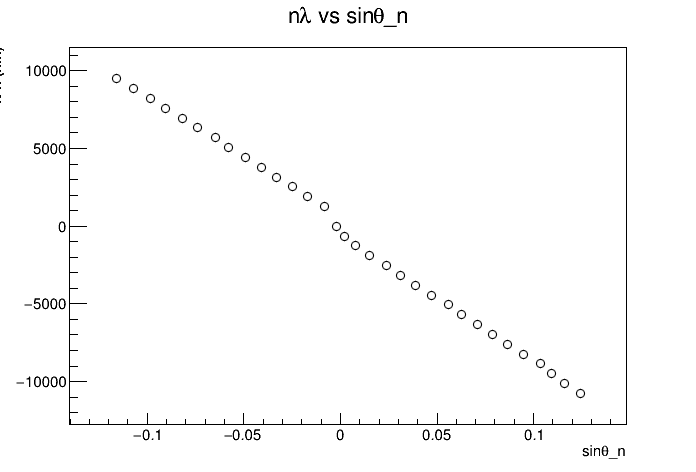

In [4]:
c1 = TCanvas( 'c1', '..', 200, 10, 700, 500 )
             
mygraph = TGraphErrors(ndata-1,x,y,sx,sy)
mygraph.Draw("AP")
mygraph.SetTitle("n#lambda vs sin#theta_n")
mygraph.SetLineColor( 1 )
mygraph.SetLineWidth( 2 )
mygraph.SetMarkerColor( 1 )
mygraph.SetMarkerStyle( 4 )

mygraph.GetYaxis().SetTitle( '#lambda n (nm)' )
mygraph.GetXaxis().SetTitle( 'sin#theta_n')
c1.Draw()


****************************************
Minimizer is Linear
Chi2                      =   2.9176e+06
NDf                       =           30
p0                        =     -124.281   +/-   55.3502     
p1                        =     -86545.7   +/-   781.232     


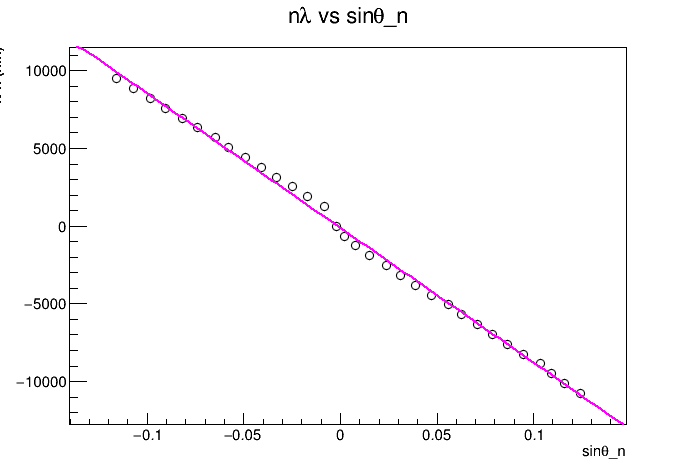

In [5]:
fnew=TF1('fnew','pol1')
fnew.SetLineColor(6)
mygraph.Fit(fnew,'','')
c1.Draw()

In [6]:
#Calculations of part 2
n=[4.3,6.5,8.2,9.4,10.6,11.7,12.7,13.6,14.4,15.3,16,16.7,17.4,18.1,18.8,19.5,20,20.6,21.1,21.7,22.3,22.8]
sn=[0.4,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
ndata=len(n)
l=[]
sl=[]
w=[]
d=0.05
x=95.5
avg=0
totw=0
for i in range (1,ndata):
    l.append((d/(2*i*x**2))*(n[i]**2-n[0]**2))
    sl.append(np.sqrt((d*n[i]*sn[i]/(i*x**2))**2+(d*n[0]*sn[0]/(i*x**2))**2+(d*(n[i]**2-n[0]**2)*0.1/(i*x**3))**2))
    w.append(1/sl[i-1]**2)
    totw+=w[i-1]
    avg+=w[i-1]*l[i-1]
print(avg/totw)
print(np.sqrt(1/totw))
print(l)
print(sl)

6.53178915017865e-05
4.0519598907617284e-07
[6.512979359118446e-05, 6.681560264247142e-05, 6.384145171459117e-05, 6.432800635947481e-05, 6.49105013568707e-05, 6.523943970834133e-05, 6.518853258251849e-05, 6.471519421068502e-05, 6.566584127506251e-05, 6.510512321482416e-05, 6.48905656992058e-05, 6.493562859205247e-05, 6.518039949141072e-05, 6.558208382445658e-05, 6.610929890445255e-05, 6.536107836956224e-05, 6.54442199565608e-05, 6.498359876830861e-05, 6.52682939496984e-05, 6.56232011183904e-05, 6.544176290071414e-05]
[1.4255596599533585e-05, 6.515995433682129e-06, 4.65840199951388e-06, 3.7440731321516242e-06, 3.1871715624034656e-06, 2.8062229269295694e-06, 2.5241442083974486e-06, 2.3028043044316697e-06, 2.142681808978202e-06, 1.996361370333541e-06, 1.8773122217015963e-06, 1.7786661255994942e-06, 1.6956738313981012e-06, 1.6249475984417385e-06, 1.5640068013935607e-06, 1.4981813662745586e-06, 1.4462964058544034e-06, 1.3946115407244835e-06, 1.3539499740158138e-06, 1.317504383170305e-06, 1.